<!-- <img src="../assets/logo3.png" width="200" height="200" > -->

<div style="display:block"><br><br>
    <div style="display:block" align=left display=block> 
        <font size=5><b>Day1 - HandsOn</b></font><br>
        <hr/>

</div>

<pre>
.
├── Step 1: Import necessary libraries and load the dataset
│
├── Step 2: Understand the dataset and perform exploratory data analysis (EDA)
│
├── Step 3: Visualization
│ 
├── Step 4: Split the dataset into features (X) and target variable (y)
│ 
├── Step 5: Split the dataset into training and test sets
│
├── Step 6: Running the KNN algorithm on the dataset
│
├── Step 7: Checking the output of the algorithm
│
├── Step 8: Checking the effect of dimension normalization on the model's performance
│
├── Step 9: Comparing the accuracy before and after normalization
│
├── Step 10: Checking the effect of model parameters
│
└── Step 11: Checking the types of distance functions

</pre>

# Part 1

## Step 1: Import necessary libraries and load the dataset


* In this step, we import the necessary libraries such as NumPy, Pandas, Matplotlib, Seaborn, and the breast cancer dataset from scikit-learn.
* The breast cancer dataset contains information about various features computed from digitized images of breast mass samples.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

## Step 2: Understand the dataset and perform exploratory data analysis (EDA)

* We will use the Breast Cancer dataset for this example.
* The load_breast_cancer function loads the dataset.

* In this step, we create a DataFrame from the feature data of the breast cancer dataset.
* We add the target variable (diagnosis) to the DataFrame.
* The first few rows of the DataFrame are displayed to get an initial understanding of the data.
* We check the shape of the DataFrame to see the number of rows and columns.
* Missing values are checked to ensure the data is complete.
* We visualize the distribution of the target variable using a countplot.
* The correlation between features is computed and visualized using a heatmap.

In [2]:
# Load dataset
data = load_breast_cancer()


### About the dataset


The Breast Cancer dataset used in the code is a popular benchmark dataset for binary classification tasks. It is available in scikit-learn and contains measurements of various features computed from digitized images of breast mass samples. The goal is to classify whether a given sample is benign (non-cancerous) or malignant (cancerous).

Here's some information about the Breast Cancer dataset:

* Number of Instances: 569
* Number of Features: 30
* Target Variable: Diagnosis (Benign or Malignant)
* Benign: Represented by 0
* Malignant: Represented by 1



### Create a DataFrame with the feature data

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Add the target variable to the DataFrame

In [4]:
df['target'] = data.target

### Check the first few rows of the DataFrame


* Let's take a look at the first few rows of the dataset to understand its structure and contents.

* This will help us get a sense of the data we are working with.

* Display the first few rows of the dataset

In [5]:
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


### Check the shape of the DataFrame


In [6]:
df.shape

(569, 31)

### Check for missing values

In [7]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

### Check the distribution of the target variable


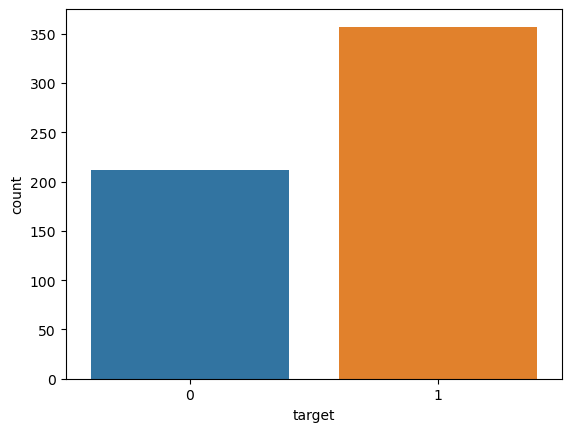

In [8]:
sns.countplot(x='target', data=df)
plt.show()

### Check the correlation between features

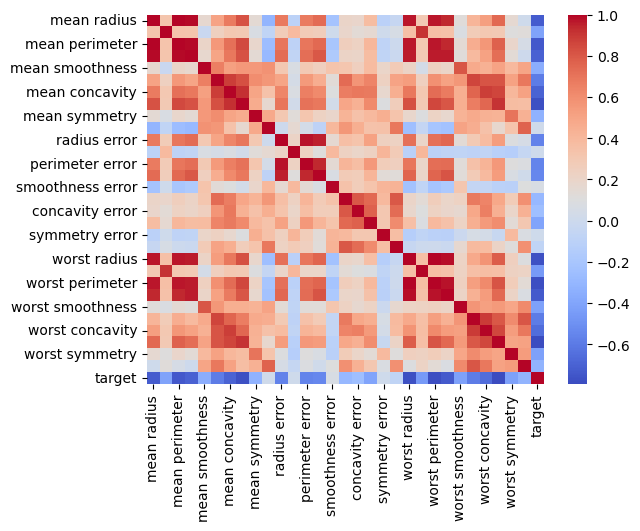

In [10]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.show()

## Step 3: Visualization

### Perform a scatter plot to visualize two features

* To visualize the relationship between two features, convert the dataset to a DataFrame using pd.DataFrame(data.data, columns=data.feature_names) and assign the target values using df['target'] = data.target.
* Define the two features (mean radius and mean texture) that you want to visualize by setting the variables feature1 and feature2.
* Create a scatter plot using plt.scatter to plot the two features against each other. The color of each point represents the target variable (target) using the c parameter and a cool-warm colormap.
* Finally, add labels and a title to the plot for better understanding and visualization.

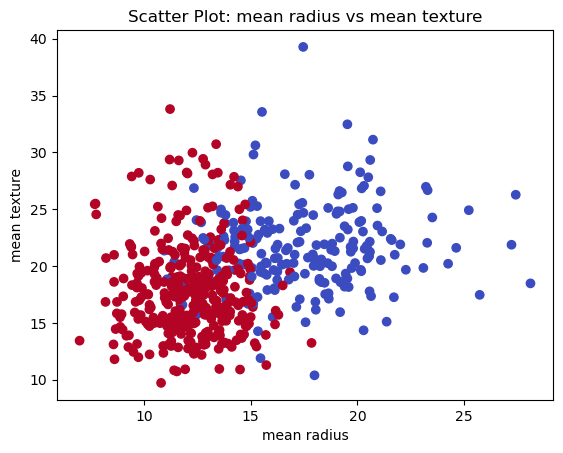

In [14]:
# Convert the dataset to a DataFrame
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
# Define the features to visualize
feature1 = 'mean radius'
feature2 = 'mean texture'

# Create a scatter plot
plt.scatter(df[feature1], df[feature2], c=df['target'], cmap='coolwarm')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Scatter Plot: {feature1} vs {feature2}')
plt.show()


### Create a boxplot to compare the distribution of a feature by target class

* To compare the distribution of a feature based on target class, import the seaborn library using import seaborn as sns.
* Specify the feature you want to analyze by setting the variable feature to 'mean area'.
* Create a boxplot using sns.boxplot, where the x-axis represents the target variable (target), and the y-axis represents the feature values.
* Add labels and a title to the plot to provide clear information about the visualization.


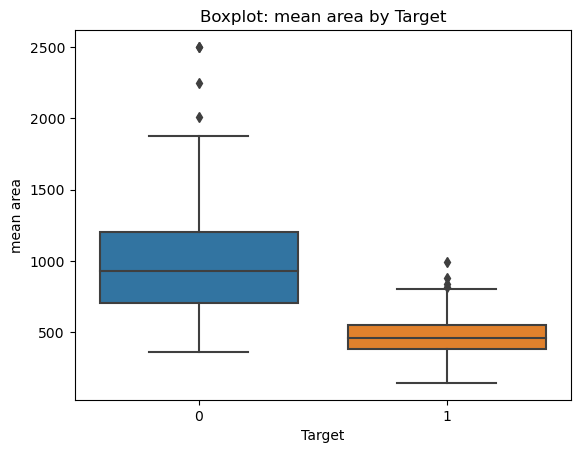

In [16]:
# Import the necessary library
import seaborn as sns

# Define the feature for boxplot
feature = 'mean area'
# Create a boxplot
sns.boxplot(x=df['target'], y=df[feature])
plt.xlabel('Target')
plt.ylabel(feature)
plt.title(f'Boxplot: {feature} by Target')
plt.show()

### Visualize the distribution of a feature by target class using a histogram

* To visualize the distribution of a feature based on target class, specify the feature you want to analyze by setting the variable feature to 'mean smoothness'.
* Create a histogram using sns.histplot. The feature values will be represented on the x-axis, and the frequency of occurrence will be represented on the y-axis. The histogram bars will be overlaid with a KDE (kernel density estimation) curve.
* Add labels and a title to the plot to provide clear information

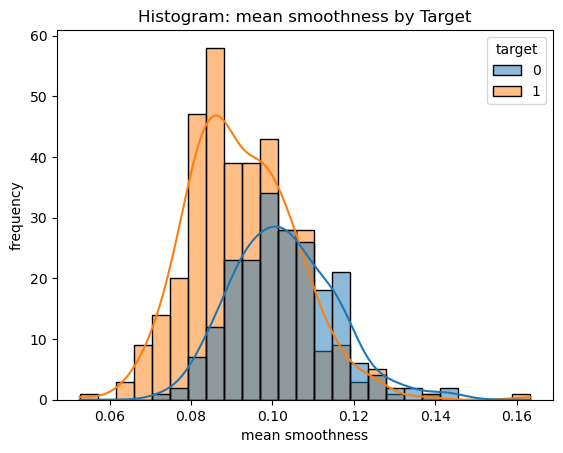

In [19]:
# Define the feature for histogram
feature = 'mean smoothness'
# Create a histogram with KDE
sns.histplot(data=df, x=feature, hue='target', kde=True)
plt.xlabel(feature)
plt.ylabel('frequency')
plt.title(f'Histogram: {feature} by Target')
plt.show()

## Step 4: Split the dataset into features (X) and target variable (y)

* In machine learning, we typically split the dataset into features (input variables) and a target variable (output variable).
* The features are the attributes or characteristics of the data that we will use to make predictions.
* The target variable is the variable we want to predict.

* Split the dataset into features (X) and target variable (y)


In [20]:
X = df.drop('target', axis=1)
y = df['target']
# you also can use df for spilt dataset by drop().

## Step 5: Split the dataset into training and test sets

* It is important to evaluate our machine learning model on data it has never seen before.
* Therefore, we split the dataset into a training set and a test set.
* The training set will be used to train the model, and the test set will be used to evaluate its performance.

* Split the dataset into training and test sets


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)


___________

# Part 2

## Step 6: Running the KNN algorithm on the dataset

* Creating a KNN classifier
* fitting it to the training data
* making predictions on the test data.



In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

## Step 7: Checking the output of the algorithm

* Printing the predicted labels to see the output of the KNN algorithm.




In [26]:
print("Predicted labels:")
print(y_pred)


Predicted labels:
[1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


## Step 8: Checking the effect of normalization on the model's performance

* Normalizing the feature variables using StandardScaler to improve the model's performance.



In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_normalized = KNeighborsClassifier(n_neighbors=5)
knn_normalized.fit(X_train_scaled, y_train)
y_pred_normalized = knn_normalized.predict(X_test_scaled)

## Step 9: Comparing the accuracy before and after normalization


In [30]:

accuracy_before_normalization = accuracy_score(y_test, y_pred)
accuracy_after_normalization = accuracy_score(y_test, y_pred_normalized)


print("Accuracy before normalization:", accuracy_before_normalization)
print("Accuracy after normalization:", accuracy_after_normalization)


Accuracy before normalization: 0.956140350877193
Accuracy after normalization: 0.9473684210526315


## Step 10: Checking the effect of model parameters

* Varying the number of neighbors (k) to observe its effect on the model's accuracy.


In [36]:

k_values = range(1,10)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k}: {accuracy}")

Accuracy for k=1: 0.9385964912280702
Accuracy for k=2: 0.9385964912280702
Accuracy for k=3: 0.9473684210526315
Accuracy for k=4: 0.956140350877193
Accuracy for k=5: 0.9473684210526315
Accuracy for k=6: 0.956140350877193
Accuracy for k=7: 0.9473684210526315
Accuracy for k=8: 0.956140350877193
Accuracy for k=9: 0.9649122807017544


## Step 11: Checking the types of distance functions
* Varying the distance metric used by the KNN algorithm to observe its effect on accuracy.



In [38]:

distance_functions = ['euclidean', 'manhattan', 'chebyshev']
for metric in distance_functions:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {metric.capitalize()} distance: {accuracy}")

Accuracy for Euclidean distance: 0.9473684210526315
Accuracy for Manhattan distance: 0.9649122807017544
Accuracy for Chebyshev distance: 0.9210526315789473
